# Data Exploration

Hey! During this first step, please, take a look at the data set and just explore it, find the types of each column and try to find interesting things. Don't worry about data cleaning. Just exploration for now.  
You can answer the following questions:
- How many columns there are
- The type of each column
- The different values that a column can take
- Which do you think are the most important columns? If we are looking at the overall score.

Go wild! (Remember, so far, only exploration).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Saber_11__2019-2.csv')
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8552\1341599079.py:1: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Saber_11__2019-2.csv')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO


In [3]:
df.shape

(546212, 82)

In [4]:
df['PUNT_GLOBAL'].describe()

count    546212.000000
mean        246.186464
std          51.386858
min           0.000000
25%         207.000000
50%         243.000000
75%         282.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64

In [5]:
gender_scores = df.groupby('ESTU_GENERO')['PUNT_GLOBAL'].describe()

gender_scores

,count,mean,std,min,25%,50%,75%,max
ESTU_GENERO,,,,,,,,
-,121.0,250.016529,46.819331,162.0,217.0,251.0,281.0,370.0
F,295994.0,242.191565,50.138217,0.0,204.0,238.0,277.0,473.0
M,250097.0,250.912642,52.437067,0.0,211.0,248.0,288.0,477.0


In [6]:
#porcentaje promedio de participación masculina
25009700/546212

45.787533045777096

In [7]:
# porcentaje de hombres en el rango de edad de 16 a 19 años de edad según datos macro
a=2128079+2042505
(2128079*100)/a

51.02592346779252

In [8]:
# en vez de utilizar doto el dataframe definimos uno más pequeño con lo que creo que utilizaré
df1=df[["PERIODO" , "ESTU_GENERO", "ESTU_DEPTO_RESIDE"]].groupby([ "ESTU_DEPTO_RESIDE" ,"ESTU_GENERO"  ]).count()
df1

PERIODO
ESTU_DEPTO_RESIDE ESTU_GENERO         
AMAZONAS          -                  1
                  F                471
                  M                353
ANTIOQUIA         -                  9
                  F              41120
...                                ...
VALLE             M              16982
VAUPES            F                167
                  M                186
VICHADA           F                232
                  M                267

[88 rows x 1 columns]

In [9]:
df2=df.loc[:, ["ESTU_GENERO","PUNT_GLOBAL","ESTU_DEPTO_RESIDE"]]
df2

,ESTU_GENERO,PUNT_GLOBAL,ESTU_DEPTO_RESIDE
0,M,208,MAGDALENA
1,M,299,BOGOTÁ
2,M,299,BOLIVAR
3,M,309,BOGOTÁ
4,M,288,BOGOTÁ
...,...,...,...
546207,M,360,ANTIOQUIA
546208,M,360,BOGOTÁ
546209,M,377,ARAUCA
546210,M,278,SANTANDER


In [10]:
#vemos la proporcion de hombre vs mujeres por depto
gender_counts = df2.groupby(["ESTU_DEPTO_RESIDE","ESTU_GENERO" ]).size()
gender_percentages = gender_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(gender_percentages)


ESTU_DEPTO_RESIDE  ESTU_GENERO
AMAZONAS           -               0.121212
                   F              57.090909
                   M              42.787879
ANTIOQUIA          -               0.012125
                   F              55.396885
                                    ...    
VALLE              M              43.949275
VAUPES             F              47.308782
                   M              52.691218
VICHADA            F              46.492986
                   M              53.507014
Length: 88, dtype: float64


In [25]:
hist= gender_percentages.hist
hist

<bound method hist_series of ESTU_DEPTO_RESIDE  ESTU_GENERO
AMAZONAS           -               0.121212
                   F              57.090909
                   M              42.787879
ANTIOQUIA          -               0.012125
                   F              55.396885
                                    ...    
VALLE              M              43.949275
VAUPES             F              47.308782
                   M              52.691218
VICHADA            F              46.492986
                   M              53.507014
Length: 88, dtype: float64>

In [11]:
average_scores = df2.groupby("ESTU_DEPTO_RESIDE")["PUNT_GLOBAL"].mean()
print(average_scores)

ESTU_DEPTO_RESIDE
AMAZONAS           213.061818
ANTIOQUIA          241.928208
ARAUCA             241.085740
ATLANTICO          241.557693
BOGOTÁ             266.450622
BOLIVAR            227.533886
BOYACA             261.560461
CALDAS             246.178376
CAQUETA            233.480250
CASANARE           246.739029
CAUCA              228.094707
CESAR              238.436502
CHOCO              200.808793
CORDOBA            235.604532
CUNDINAMARCA       253.136341
EXTRANJERO         235.164179
GUAINIA            222.988806
GUAVIARE           224.022616
HUILA              250.018881
LA GUAJIRA         218.125679
MAGDALENA          221.329885
META               247.901300
NARIÑO             244.311306
NORTE SANTANDER    255.308853
PUTUMAYO           236.573307
QUINDIO            251.880031
RISARALDA          250.391402
SAN ANDRES         230.035088
SANTANDER          264.064617
SUCRE              235.894722
TOLIMA             240.876384
VALLE              242.553830
VAUPES             209

In [12]:
average_scores = average_scores.sort_values(ascending=False)

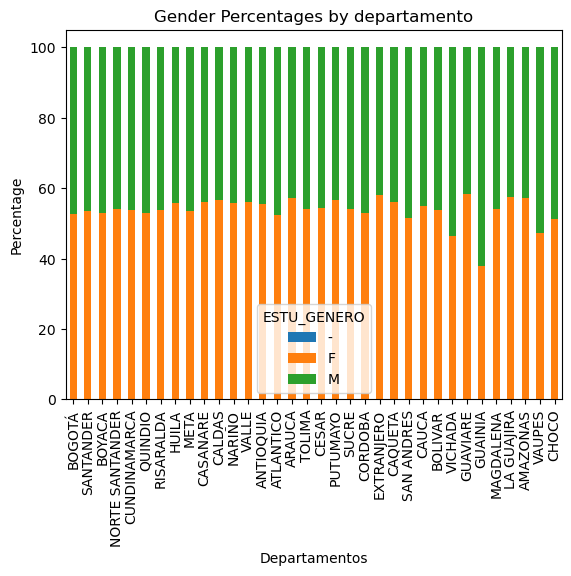

In [13]:
gender_percentages.unstack().loc[average_scores.index].plot(kind='bar', stacked=True)


plt.title('Gender Percentages by departamento')
plt.xlabel('Departamentos')
plt.ylabel('Percentage')
plt.rcParams["figure.figsize"] = (15,6)


plt.show()

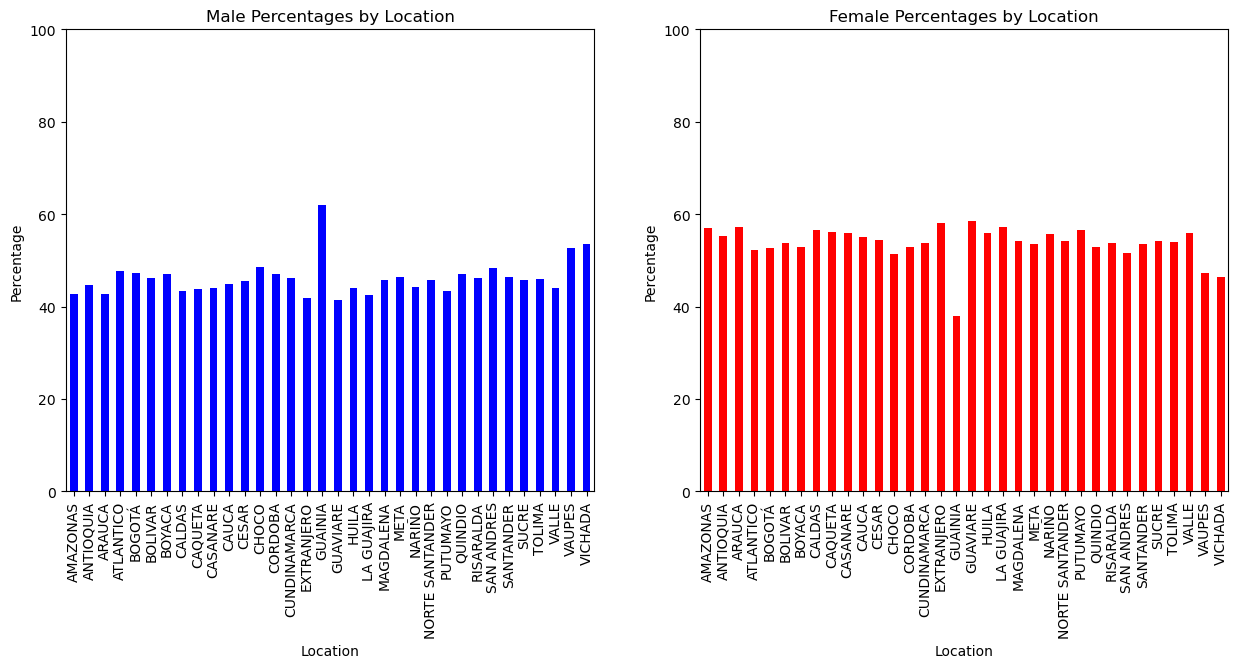

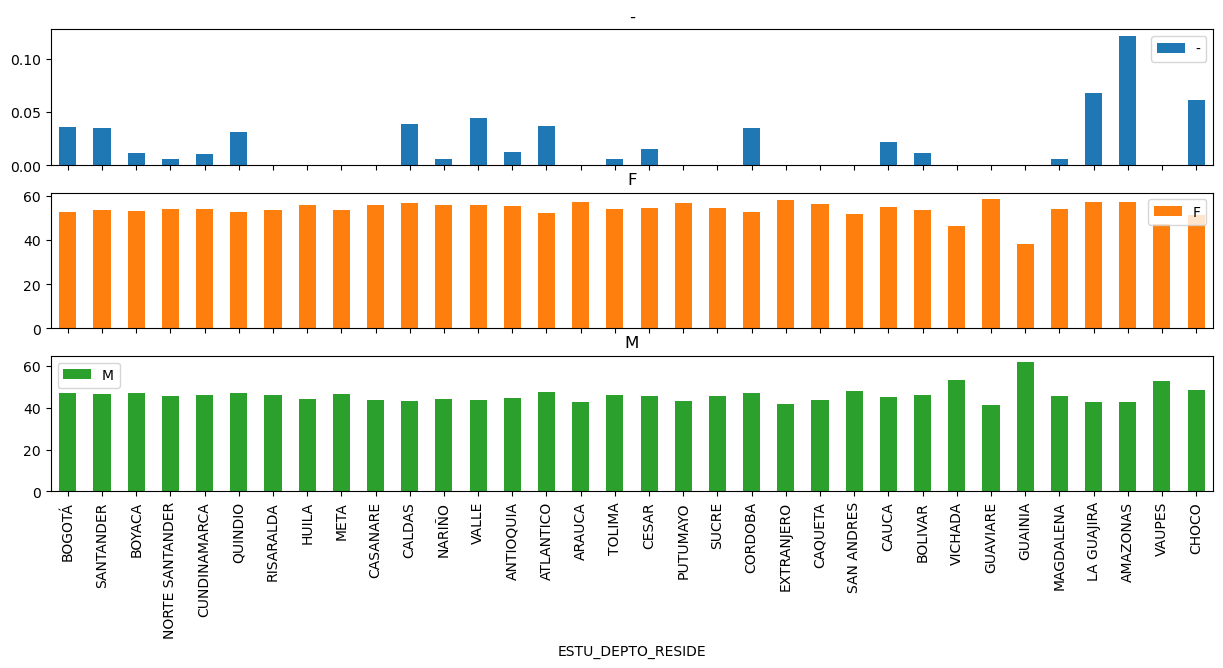

In [14]:
# create the figure and two subplots
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

# plot the male percentages
gender_percentages.unstack().loc[average_scores.index].plot(kind='bar', stacked=True, subplots= True)

gender_percentages.unstack()["M"].plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Male Percentages by Location')
ax[0].set_xlabel('Location')
ax[0].set_ylabel('Percentage')
ax[0].set_ylim([0,100])

# plot the female percentages
gender_percentages.unstack()["F"].plot(kind='bar', ax=ax[1], color='red')
ax[1].set_title('Female Percentages by Location')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Percentage')
ax[1].set_ylim([0,100])

plt.show()

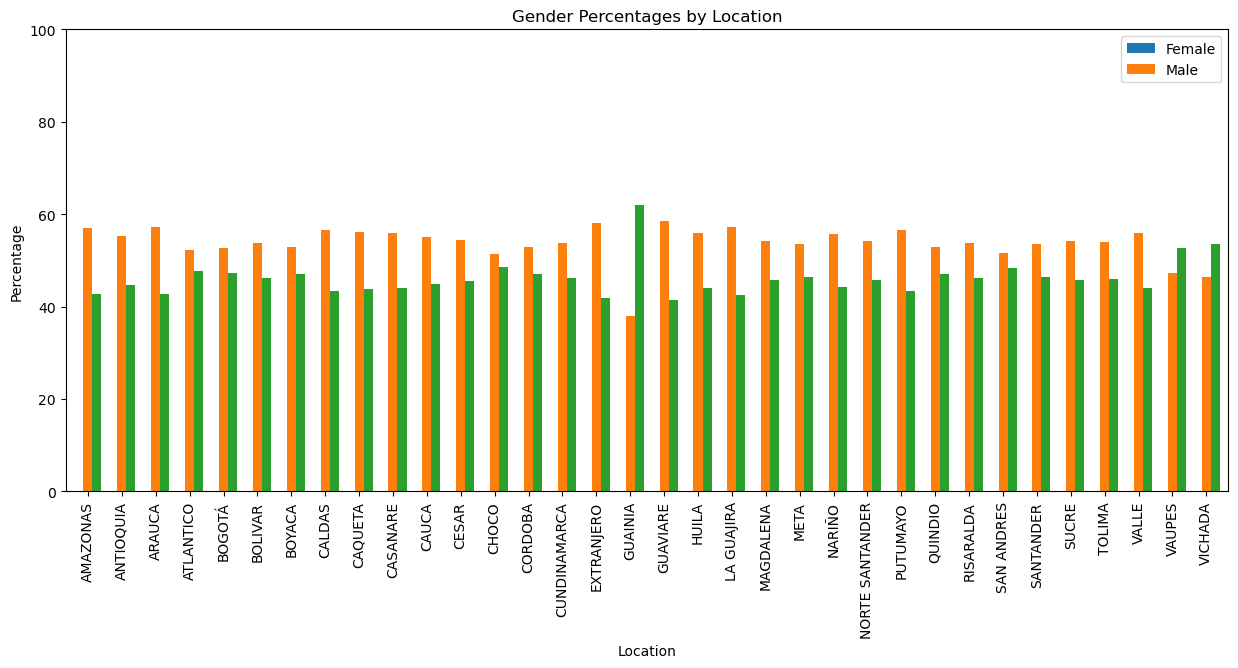

In [15]:
ax = gender_percentages.unstack().plot(kind='bar', width=0.8, position=0.5, figsize=(15,6))
ax.set_title('Gender Percentages by Location')
ax.set_xlabel('Location')
ax.set_ylabel('Percentage')
ax.set_ylim([0,100])
ax.legend(["Female", "Male"], loc="upper right")

# add a bar for the average test score

#average_scores.plot(kind="bar", color="green", alpha=0.5, width=0.3, position=1.5)

plt.show()

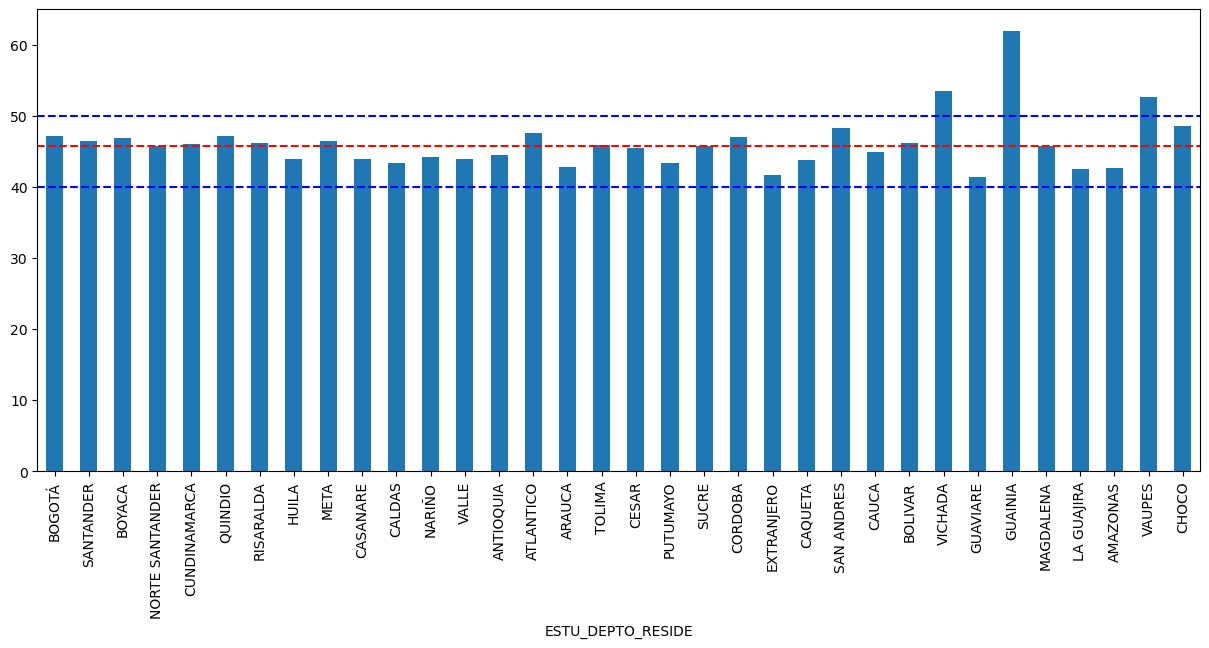

In [16]:
gender_percentages.unstack()["M"].loc[average_scores.index].plot(kind='bar')
plt.axhline(y=45.8, color='red', linestyle='--')
plt.axhline(y=50,color="blue", linestyle='--')
plt.axhline(y=40,color="blue", linestyle='--')

plt.show()

In [17]:
df4=df.loc[:, ["ESTU_GENERO","PUNT_GLOBAL","ESTU_DEPTO_RESIDE","ESTU_ETNIA","ESTU_TIENEETNIA"]]
df4

,ESTU_GENERO,PUNT_GLOBAL,ESTU_DEPTO_RESIDE,ESTU_ETNIA,ESTU_TIENEETNIA
0,M,208,MAGDALENA,-,No
1,M,299,BOGOTÁ,-,No
2,M,299,BOLIVAR,-,No
3,M,309,BOGOTÁ,Ninguno,Si
4,M,288,BOGOTÁ,-,No
...,...,...,...,...,...
546207,M,360,ANTIOQUIA,-,No
546208,M,360,BOGOTÁ,-,No
546209,M,377,ARAUCA,-,No
546210,M,278,SANTANDER,-,No


In [18]:
df4["ESTU_ETNIA"].unique()

array(['-', 'Ninguno', 'Comunidad afrodescendiente', 'Paez', 'Zenú',
       'Otro grupo étnico minoritario', 'Wayúu', 'Emberá', 'Pijao',
       'Cubeo', 'Guambiano', 'Raizal', 'Sikuani', 'Inga', 'Pasto',
       'Huitoto', 'Arhuaco', 'Cancuamo', 'Palenquero', 'Tucano',
       'Comunidades Rom (Gitanas)'], dtype=object)

In [19]:
ethnic_counts = df.groupby('ESTU_DEPTO_RESIDE')['ESTU_TIENEETNIA'].value_counts()

# filter for the 'yes' group and sort in descending order
ethnic_counts = ethnic_counts.loc[:, 'Si'].sort_values(ascending=False)

# print the resulting Series
print(ethnic_counts)

ESTU_DEPTO_RESIDE
CAUCA              5039
NARIÑO             4122
CHOCO              3961
VALLE              3680
LA GUAJIRA         3523
CORDOBA            2889
BOGOTÁ             2739
BOLIVAR            2473
SUCRE              2042
ANTIOQUIA          1748
CESAR              1217
ATLANTICO           911
PUTUMAYO            763
TOLIMA              730
MAGDALENA           615
CALDAS              573
AMAZONAS            350
SAN ANDRES          347
RISARALDA           332
VAUPES              277
META                206
CUNDINAMARCA        200
GUAINIA             177
VICHADA             153
HUILA               124
GUAVIARE            120
ARAUCA               98
CAQUETA              86
CASANARE             75
BOYACA               64
QUINDIO              56
SANTANDER            37
NORTE SANTANDER      34
Name: ESTU_TIENEETNIA, dtype: int64


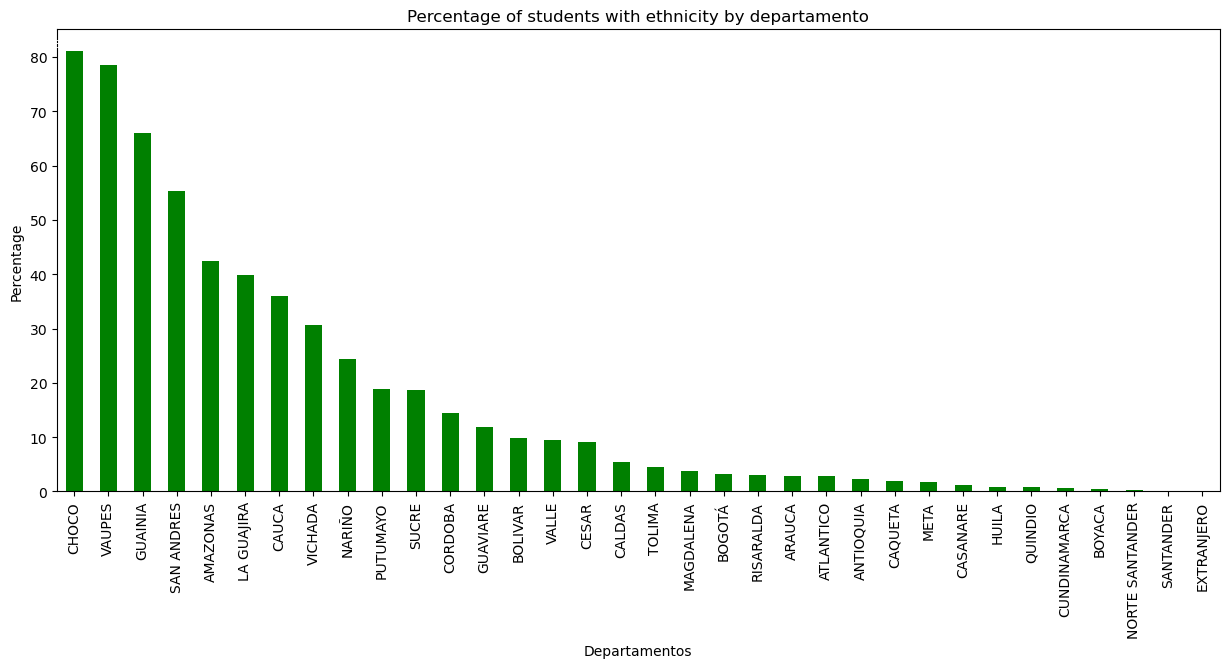

In [20]:
# calculate percentage of students with ethnicity in each department
ethnic_percentages = df.groupby('ESTU_DEPTO_RESIDE')['ESTU_TIENEETNIA'] \
                       .apply(lambda x: (x=='Si').sum()/len(x)*100) \
                       .sort_values(ascending=False)

# plot the results
ax = ethnic_percentages.plot(kind='bar', color='green')

# set labels and title
ax.set_xlabel('Departamentos')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of students with ethnicity by departamento')

# add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', fontsize=8, color='white', xytext=(0, 5), 
                textcoords='offset points')

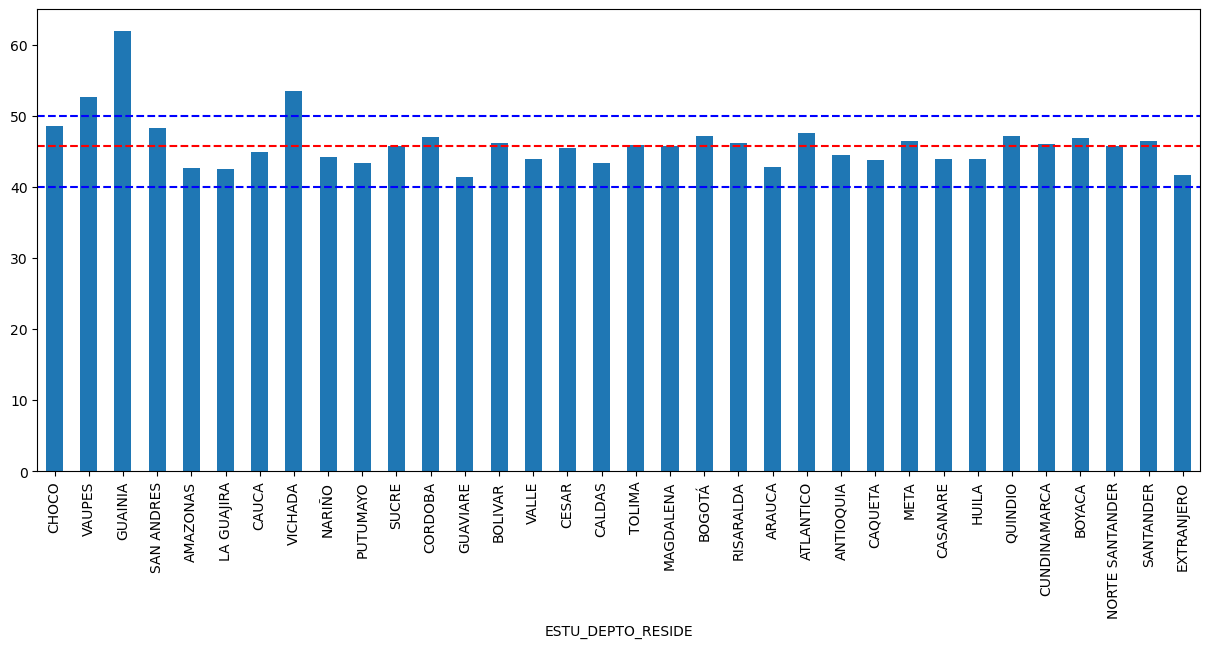

In [21]:
gender_percentages.unstack()["M"].loc[ethnic_percentages.index].plot(kind='bar')
plt.axhline(y=45.8, color='red', linestyle='--')
plt.axhline(y=50,color="blue", linestyle='--')
plt.axhline(y=40,color="blue", linestyle='--')


In [ ]:
excluded_locations = ["CHOCO", "VAUPES","GUAINIA","VICHADA"]
gender_percentages.unstack()["M"].loc[average_scores.index].plot(kind='bar')

plt.axhline(y=45.8, color='red', linestyle='--')
plt.axhline(y=50,color="blue", linestyle='--')
plt.axhline(y=40,color="blue", linestyle='--')

plt.show()

In [ ]:
clean_df=